# Unit 5 - Financial Planning

In [1]:
!pip install alpaca-trade-api
!pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 17.4 MB/s eta 0:00:00
Reason for being yanked: This version includes overly restrictive multidict upper boundary disallowing multidict v6+. The previous patch version didn't have that and this is now causing dependency resolution problems for the users who have an "incompatible" version pinned. This is not really necessary anymore and will be addressed in the next release v3.8.3

https://github.com/aio-libs/aiohttp/pull/6950
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.7
    Uninstalling msgpa

In [2]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta

%matplotlib inline

In [3]:
# Load .env enviroment variables|
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
monthly_income = 12000.00

# ::::: CRYPTO ASSETS :::::
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_current_price = float(requests.get(btc_url).json()["data"]["1"]["quotes"]["USD"]["price"])
btc_current_price

31060.0

In [7]:
# Fetch current ETH price
eth_current_price = float(requests.get(eth_url).json()["data"]["1027"]["quotes"]["USD"]["price"])
eth_current_price

1689.62

In [8]:
# Compute current value of my crpto
my_btc_value = btc_current_price * my_btc
my_eth_value = eth_current_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37272.00
The current value of your 5.3 ETH is $8954.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
print(alpaca_api_key)

alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")
print(alpaca_secret_key)


# Alpaca API object
# Version number not necessary to provide given package's default opts
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

PK075R4MFKPGUKJCERQW
Fi5QX8kORZeX0pT3OAFdIxCdeBumUuvgJ76d2s2W


In [52]:
# Date parameters and format current date as ISO format
date = pd.Timestamp("2023-10-23", tz="America/New_York").isoformat()


# Tickers
tickers = ["AGG", "SPY"]


# Timeframe to "1Day" for Alpaca API
timeframe = "1Day"


# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = date,
    end = date
).df


# Reorganizes and concatenates the seperate ticker data but I choose to keep
# them together out of personal preference, which is why these lines are
# commented
AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop("symbol", axis = 1)
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop("symbol", axis = 1)
df_portfolio = pd.concat([AGG, SPY], axis = 1, keys = ["AGG", "SPY"])


# Preview DataFrame
df_portfolio

AGG                                            \
                            close  high      low trade_count  open   volume   
timestamp                                                                     
2023-10-23 04:00:00+00:00  92.445  92.5  91.5819       25010  91.7  7276823   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-10-23 04:00:00+00:00  92.226262  423.09  424.45  417.8      485380   

                                                         
                             open    volume        vwap  
timestamp                                                
2023-10-23 04:00:00+00:00  419.61  59508970  421.597159

In [71]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $92.445
Current SPY closing price: $423.09


In [72]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares

print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $18489.00
The current value of your 50 SPY shares is $21154.50


### Savings Health Analysis

In [106]:
# Savings DataFrame
crypto_tv = my_btc_value + my_eth_value
print(crypto_tv)

stock_tv = my_agg_value + my_spy_value
print(stock_tv)

savings_data = [crypto_tv, stock_tv]

savings_df = pd.DataFrame(savings_data,
                          columns = ["amount"],
                          index = ["crypto", "stock/bond"])

# Display savings DataFrame
display(savings_df)

46226.986
39643.5


,amount
crypto,46226.986
stock/bond,39643.500


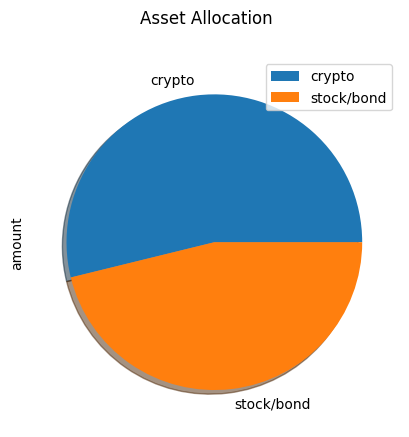

In [103]:

# Plot savings pie chart with title and shadow
savings_pie = savings_df.plot(kind = "pie",
                              title = "Asset Allocation",
                              shadow = True,
                              subplots = True)

In [117]:
# Ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = crypto_tv + stock_tv


# Created test cases to evaluate if statement correctness
# total_savings = monthly_income * 3
#total_savings = 420

print(total_savings)


# Determine if total portfolio is enough to fund the emergency portfolio
if total_savings > emergency_fund:
  print("Congratulations! Your total savings is greater than your emergency fund goal🎉")
elif total_savings == emergency_fund:
  print("Congratulations! You've just reached your emergency fund goal ✅")
else:
  print(f"Amount until goal is reached: ${(emergency_fund - total_savings):0.2f}")

85870.486
Congratulations! Your total savings is greater than your emergency fund goal🎉


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")